# **DEALING WITH CATEGORICAL VARIABLES** & Feature Encoding

1. the difference between categorical and continuous data in your dataset and identifying the type of data.
2. to do exploration of such data to extract information from it.
3. you will learn more about various encoding techniques in machine learning for categorical data in Python.
    * Label Encoding
    * One-Hot Encoding
    * Get Dummies
    * High Cardinality
    * Curse of Dimensionality
    * Feature Harshing

<br>

###What is a Feature/Variable?


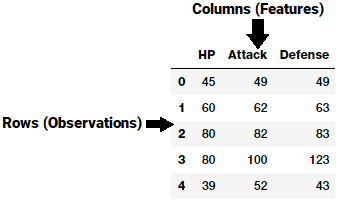

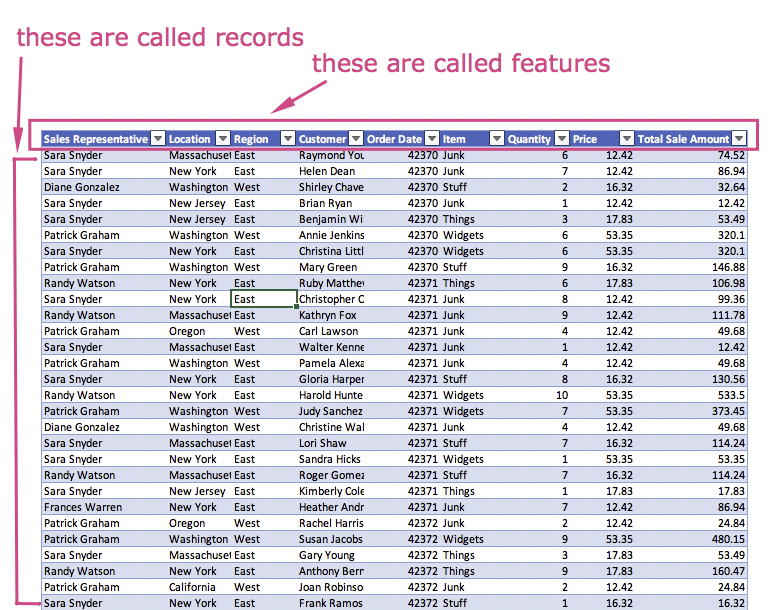


<br>


A **categorical variable** (sometimes called a nominal variable) is one that has two or more categories.

Categorical features can only take on a limited, and usually fixed, number of possible values.

For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.

If the data you're working with is related to products, you will find features like product type, manufacturer, seller and so on. These are categorical variables.

Features which have some order associated with them are called ***ordinal features***. For example,temperature may be described as low, medium and high, which have an order associated with them.

The challenge is determining how to use this data in your analysis because of the following constraints:
1. Categorical features may have a very large number of levels, known as high cardinality, (for example, cities or URLs), where most of the levels appear in a relatively small number of instances.
2. Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.
3. While some ML packages or libraries might transform categorical data to numeric automatically based on some default embedding method, many other ML packages don’t support such inputs.

It is therefore important to critically deal with your dataset to make sure you have the right data to feed your algorithm to build a robust machine learing model.

## **Dataset Description**

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics. With certain types you can also give a geeky introduction to machine learning.

These are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

The data as described by Myles O'Neill is:

* **'#'**: ID for each pokemon
* **Name:** Name of each pokemon
* **Type 1:** Each pokemon has a type, this determines weakness/resistance to * attacks
* **Type 2:** Some pokemon are dual type and have 2
* **Total:** sum of all stats that come after this, a general guide to how strong a pokemon is
* **HP:** hit points, or health, defines how much damage a pokemon can withstand before fainting
* **Attack:** the base modifier for normal attacks (eg. Scratch, Punch)
* **Defense:** the base damage resistance against normal attacks
* **SP Atk:** special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* **SP Def:** the base damage resistance against special attacks
* **Speed:** determines which pokemon attacks first each round

The data for this table has been acquired from several different sites, including:

* pokemon.com
* pokemondb
* bulbapedia

One question has been answered with this database: The type of a pokemon cannot be inferred only by it's Attack and Deffence. It would be worthy to find which two variables can define the type of a pokemon, if any. 

Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.


In this tutorial, we will be using this Pokemon dataset to demonstrate the concept on dealing with **categorical variables** and the various **feature encoding** techniques.

<br>

***let's get started***

<br>

Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/Pokemon.txt', sep=",",header=0)

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [4]:
df.shape

(800, 13)

In [5]:
df=df.drop('#',axis=1)

In [7]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


# **Dealing With Ordinal Categorical Variables**

Taking for example Temperature described as **Low**,**Medium** and **High**, we can say there is some sort of order unlinke saying **Red**,**Blue** and **Green** where we cannot order the items.

In our dataset, **Generation** consists of 'Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6' which we must becareful since this is an ordinal categorical variable. That's, Generation 2 comes after Generation 1 and Generation 3 comes after Generation 2 and so on...

<br>

**Let's explore some categorical variables in the dataset.**

Let's take the ***Generation*** for instance. This consist of different categories of generations such as Gen1, Gen 2, Gen 3, all the way to Gen 6

Let's find out these different categories to see how many of them are there.

In [8]:
df['Generation'].unique()

array(['Gen 1', 'FALSE', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'],
      dtype=object)

In [9]:
unique_generations = np.unique(df['Generation'])
unique_generations

array(['FALSE', 'Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'],
      dtype=object)

In [10]:
len(df['Generation'])

800

In [11]:
len(unique_generations)

7

We can see that we have **7 different categories** of ***Generation*** in our dataset.

We cannot build algorithm using these categories in their raw state. 

We will therefore transform these features by:

1. manual encoding
2. using **scikit-learn's Label-Encoder** to generate a label encoding scheme for mapping each category to a numeric value.

# **Manual Label Encoding**

In [12]:
df['New_Generation'] = df['Generation'].map({'FALSE':0,
                   'Gen 1':1,
                   'Gen 2':2,
                   'Gen 3':3,
                   'Gen 4':4,
                    'Gen 5':5,
                    'Gen 6':6})

In [13]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New_Generation
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False,1


# **Label Encoding**

The LabelEncoder does the same thing as we did manually

let's see how it works

In [14]:
df = pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/Pokemon.txt', sep=",",header=0)
df=df.drop('#',axis=1)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


**Let's LabelEncode the Generation again, this time the sklearn label_encoder**

## LabelEncoder: Generation

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
gen_labels = le.fit_transform(df['Generation'])
gen_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [17]:
df['Generation'].corr()

TypeError: corr() missing 1 required positional argument: 'other'

**let's see what each label stands for**

In [18]:
genre_mappings = {index: label for index, label in enumerate(le.classes_)}
genre_mappings

{0: 'FALSE',
 1: 'Gen 1',
 2: 'Gen 2',
 3: 'Gen 3',
 4: 'Gen 4',
 5: 'Gen 5',
 6: 'Gen 6'}

**Let's add these new lables to our dataframe**

In [19]:
df['Gen_Label'] = gen_labels

In [20]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Gen_Label
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False,1


**Now you will agree with me that *Generation* and *Gen_Labels* are equal right**. So then why keep both of them?

We will drop the old Generation column

In [21]:
df=df.drop('Generation',axis=1) #using axis=1 to indicate Generation is located in the column of our dataset. NB: axis=1 if for column, axis=0 is for rows

In [22]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Gen_Label
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False,1


## Working With Nominal Categorical Attributes

Nominal Attributes has no intrinsic ordering to the categories. For example gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.

In this case we cannot say **False** is greater than **True** and vice-versa


## LabelEncoder: Legendary

In [23]:
unique_legendary = np.unique(df['Legendary'])
unique_legendary

array([False, nan, False, True], dtype=object)

In [24]:
le = LabelEncoder()
leg_labels = le.fit_transform(df['Legendary'])
leg_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
genre_mappings = {index: label for index, label in enumerate(le.classes_)}
genre_mappings

{0: False, 1: True, 2: nan}

In [26]:
df['Legend_Label'] = leg_labels

In [28]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Gen_Label,Legend_Label
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False,1,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False,1,0


In [29]:
df=df.drop('Legendary',axis=1) #using axis=1 to indicate Genre is located in the column of our dataset. NB: axis=1 if for column, axis=0 is for rows

In [30]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Gen_Label,Legend_Label
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


#**High Cardinality Columns**

## LabelEncoder: Type 2

In [31]:
df['Type 2']=df['Type 2'].astype(str)
unique_Type2 = np.unique(df['Type 2'])
unique_Type2

array(['314', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting',
       'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal',
       'Poison', 'Psychic', 'Rock', 'Steel', 'Water', 'nan'], dtype=object)

In [32]:
le = LabelEncoder()
typ2_labels = le.fit_transform(df['Type 2'])
typ2_labels

array([14, 14, 14, 14, 19, 19,  8,  3,  8,  0, 19, 19, 19, 19, 19,  8, 14,
       14, 14, 14,  8,  8,  8,  8, 19, 19,  8,  8, 19, 19, 19, 19, 19, 19,
       19, 19, 11, 19, 19, 11, 19, 19, 19, 19,  5,  5,  8,  8, 14, 14, 14,
       10, 10, 14, 14, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,  6,
       19, 19, 19, 19, 19, 19, 19, 14, 14, 14, 14, 14, 11, 11, 11, 19, 19,
       15, 15, 15, 17, 17,  8,  8,  8, 19, 12, 19, 19, 19, 12, 14, 14, 14,
       14, 11, 19, 19, 19, 19, 19, 19, 15, 15, 19, 19, 19, 19, 19, 19, 19,
       16, 16, 19, 19, 19, 19, 19, 19, 19, 19, 19, 15,  5,  8, 15, 19, 19,
       19,  8, 19, 19,  8,  2, 12, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18,
        8,  8, 19,  8,  8,  8, 19, 19,  8, 19,  6, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19,  8,  8,  8,  8, 14, 14,  8,  4,  4, 19,
       19,  5, 19,  8,  8,  8, 19, 19, 19,  3, 19,  5,  5, 19, 19,  8,  8,
        8, 19, 19, 19,  8, 11, 11, 19, 19,  8, 15, 19, 19, 19, 15, 19, 17,
       19,  8, 11, 11, 19

In [33]:
#Let's see how they are mapped

genre_mappings = {index: label for index, label in enumerate(le.classes_)}
genre_mappings

{0: '314',
 1: 'Bug',
 2: 'Dark',
 3: 'Dragon',
 4: 'Electric',
 5: 'Fairy',
 6: 'Fighting',
 7: 'Fire',
 8: 'Flying',
 9: 'Ghost',
 10: 'Grass',
 11: 'Ground',
 12: 'Ice',
 13: 'Normal',
 14: 'Poison',
 15: 'Psychic',
 16: 'Rock',
 17: 'Steel',
 18: 'Water',
 19: 'nan'}

In [34]:
df['typ2_Label'] = typ2_labels #add the label to our dataframe

In [35]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Gen_Label,Legend_Label,typ2_Label
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,14
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,14
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,14
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,14
4,Charmander,Fire,nan,309,39,52,43,60,50,65,1,0,19


In [36]:
df=df.drop('Type 2',axis=1) #using axis=1 to indicate Genre is located in the column of our dataset. NB: axis=1 if for column, axis=0 is for rows


In [37]:
df.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Gen_Label,Legend_Label,typ2_Label
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,0,14
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,0,14
2,Venusaur,Grass,525,80,82,83,100,100,80,1,0,14
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,0,14
4,Charmander,Fire,309,39,52,43,60,50,65,1,0,19


## LabelEncoder: Type 1

In [38]:
df['Type 1']=df['Type 1'].astype(str)
unique_Type1 = np.unique(df['Type 1'])
unique_Type1

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)

In [39]:
le = LabelEncoder()
typ1_labels = le.fit_transform(df['Type 1'])
typ1_labels

array([ 9,  9,  9,  9,  6,  6,  6,  6,  6, 17, 17, 17, 17,  0,  0,  0,  0,
        0,  0,  0, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,  3,  3, 10, 10,
       13, 13, 13, 13, 13, 13,  4,  4,  6,  6, 12, 12, 13, 13,  9,  9,  9,
        0,  0,  0,  0, 10, 10, 12, 12, 17, 17,  5,  5,  6,  6, 17, 17, 17,
       14, 14, 14, 14,  5,  5,  5,  9,  9,  9, 17, 17, 15, 15, 15,  6,  6,
       17, 17, 17,  3,  3, 12, 12, 12, 17, 17, 13, 13, 17, 17,  8,  8,  8,
        8, 15, 14, 14, 17, 17,  3,  3,  9,  9, 10, 10,  5,  5, 12, 13, 13,
       10, 10, 12,  9, 12, 12, 17, 17, 17, 17, 17, 17, 14,  0, 11,  3,  6,
        0,  0, 12, 17, 17, 17, 17, 12, 12, 17,  3,  6, 12, 15, 15, 15, 15,
       15, 15, 12, 11,  3,  6,  2,  2,  2, 14, 14, 14, 14,  9,  9,  9,  6,
        6,  6, 17, 17, 17, 12, 12, 12, 12,  0,  0,  0,  0, 13, 17, 17,  3,
        4, 12,  4,  4, 14, 14,  3,  3,  3,  3,  9, 17, 17, 15, 17,  9,  9,
        9, 12,  9,  9,  0, 17, 17, 14,  1,  1, 17,  8, 14, 14, 12,  0,  0,
       12, 10, 16, 16,  4

In [40]:
gen_mappings = {index: label for index, label in enumerate(le.classes_)}
gen_mappings

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water'}

In [41]:
print(gen_mappings.values)

<built-in method values of dict object at 0x000002B138EB54C0>


In [42]:
df['typ1_Label'] = typ1_labels

In [43]:
df.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Gen_Label,Legend_Label,typ2_Label,typ1_Label
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,0,14,9
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,0,14,9
2,Venusaur,Grass,525,80,82,83,100,100,80,1,0,14,9
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,0,14,9
4,Charmander,Fire,309,39,52,43,60,50,65,1,0,19,6


In [44]:
df=df.drop(['Type 1','Name'],axis=1) #using axis=1 to indicate Genre is located in the column of our dataset. NB: axis=1 if for column, axis=0 is for rows

In [45]:
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Gen_Label,Legend_Label,typ2_Label,typ1_Label
0,318,45,49,49,65,65,45,1,0,14,9
1,405,60,62,63,80,80,60,1,0,14,9
2,525,80,82,83,100,100,80,1,0,14,9
3,625,80,100,123,122,120,80,1,0,14,9
4,309,39,52,43,60,50,65,1,0,19,6


Whoa!! we are good now!.

BUT there is a problem

Some few questions should be running in your mind now.

Let's consider the **Type 1** column. Does it mean that **10** is greater than **9**?. Under normal circumstance, YES, 10 is greater than 9 BUT Let's not forget 10 represents **Grass** and 9 represents **Goat**. Can we say that **Grass** is greater that **Goat**. It does'nt make sense right?

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results.

*What do we do then?*

This is when we need **One-hot Encoding**

# **One-hot Encoding**

It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column.

Each observation in the categorical feature is thus converted into a vector of size m (number of labels) with only one of the values as 1 indicating it as active and all others marked as 0s. 

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:

# encode generation labels using one-hot encoding

ohe = OneHotEncoder()
gen_feature_arr = ohe.fit_transform(df[['Gen_Label']]).toarray()
gen_feature_labels = ['FALSE', 'Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6']
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)



# encode legendary status labels using one-hot encoding

ohe = OneHotEncoder()
leg_feature_arr = ohe.fit_transform(df[['Legend_Label']]).toarray()
leg_feature_labels = [False,False, True]
leg_features = pd.DataFrame(leg_feature_arr, columns=leg_feature_labels)

In [48]:
gen_feature_arr

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:

df1 = pd.concat([df, gen_features, leg_features], axis=1)

In [50]:

df1.head(20)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Gen_Label,Legend_Label,typ2_Label,...,FALSE,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,False,False,True
0,318,45,49,49,65,65,45,1,0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,405,60,62,63,80,80,60,1,0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,525,80,82,83,100,100,80,1,0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,625,80,100,123,122,120,80,1,0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,309,39,52,43,60,50,65,1,0,19,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,405,58,64,58,80,65,80,1,0,19,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,534,78,84,78,109,85,100,1,0,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,634,78,130,111,130,85,100,1,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,634,78,104,78,159,115,100,1,0,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,44,48,65,50,64,43,Gen 1,0,2,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


From the above, we can see that dummy variables have been generated and where there is 1 representing the item is available and all others marked as 0,representing they are not available. For example where Gen 1 is present is marked as 1 and all others(Gen 2,Gen 3,Gen 4,Gen 5,Gen 6) are marked as 0s. In the same way where Gen 2 is present is marked as 1 and all others (Gen 1,Gen 3,Gen 4,Gen 5,Gen 6) are marked as 0s and so on....


We can also achieve the same thing easily by using the ***get_dummies(…)***

# **Get_Dummies**

In [52]:
df = pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/Pokemon.txt', sep=",",header=0)
df=df.drop('#',axis=1)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [53]:
pd.get_dummies(df['Generation'])

,FALSE,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,1
796,0,0,0,0,0,0,1
797,0,0,0,0,0,0,1
798,0,0,0,0,0,0,1


In [54]:

dummy_gen=pd.get_dummies(df['Generation'])
pd.concat([df, dummy_gen], axis=1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,FALSE,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False,0,1,0,0,0,0,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False,0,1,0,0,0,0,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False,0,1,0,0,0,0,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False,0,1,0,0,0,0,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,Gen 6,True,0,0,0,0,0,0,1
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,Gen 6,True,0,0,0,0,0,0,1
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,Gen 6,True,0,0,0,0,0,0,1
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,Gen 6,True,0,0,0,0,0,0,1


In [55]:
df.shape

(800, 12)

In [57]:
df1.shape

(800, 21)

# **Curse of Dimensionality**


The strategies discussed above work quite well on categorical data in general, however, they start causing problems when the number of distinct categories in any feature becomes very large. Essential for any categorical feature of m distinct labels, you get m separate features. This can easily increase the size of the feature set causing problems like storage issues, model training problems with regard to time, space and memory. 

There is also another problem called ***‘curse of dimensionality’*** where basically with an enormous number of features and not enough representative samples, model performance starts getting affected which leads to model overfitting.

# **Feature Hashing**: The hashing trick

Feature hashing, or the hashing trick is a method for turning arbitrary features into a sparse binary vector. 

A simple implementation that allows the user to pick the desired output dimensionality

In [59]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features= 3, input_type='string')
hashed_features = fh.fit_transform(df['Type 2'])
hashed_features = hashed_features.toarray()
new_df= pd.DataFrame(hashed_features)

pd.concat([df, new_df], axis=1)

TypeError: 'float' object is not iterable

[Read More About Feature Hashing Here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html)